# Assignment 2—Project Data Analysis
# Group 9 Scottish Bricks

# Describe 

# Scraping

First, to install jupyter-echarts-pypkg, pyecharts(1.7.1 version), echarts_united_kingdom_pypkg and beautifulsoup4. 

I will use the requests module to gather webpages and use the beautifulsoup module to extract information from them.Then, use pyecharts to visualize them.

In [1]:
pip install jupyter-echarts-pypkg

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyecharts==1.7.1

  Using cached pyecharts-1.7.1-py3-none-any.whl (128 kB)
  Using cached prettytable-1.0.1-py2.py3-none-any.whl (22 kB)
  Using cached simplejson-3.17.2-cp37-cp37m-manylinux2010_x86_64.whl (128 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install echarts_united_kingdom_pypkg

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [5]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from bs4 import BeautifulSoup
from pyecharts.charts import Map, Geo, Bar, WordCloud,EffectScatter,PictorialBar
from pyecharts import options as opts
from echarts_united_kingdom_pypkg import constants as UK_constants

In [6]:
requests_results = []
for page in range(1,34):
    r  = requests.get(f'https://www.scottishbrickhistory.co.uk/category/brick-and-tile-works/page/{page}/')
    html = r.text
    soup = BeautifulSoup(html)
    articles = soup.find_all('article')
    for article in articles:
        title = article.h5.text.strip().split(',')
        title = [i.strip().replace('.','').replace('(','').replace(')','') for i in title]
        time = article.span.text.strip()[-10:].split('/')
        requests_results.append((title,time))
    print(f'page {page} done.')

page 1 done.
page 2 done.
page 3 done.
page 4 done.
page 5 done.
page 6 done.
page 7 done.
page 8 done.
page 9 done.
page 10 done.
page 11 done.
page 12 done.
page 13 done.
page 14 done.
page 15 done.
page 16 done.
page 17 done.
page 18 done.
page 19 done.
page 20 done.
page 21 done.
page 22 done.
page 23 done.
page 24 done.
page 25 done.
page 26 done.
page 27 done.
page 28 done.
page 29 done.
page 30 done.
page 31 done.
page 32 done.
page 33 done.


In [7]:
print('Original data sample: ',requests_results[0])
print('Total items number: ',len(requests_results))

Original data sample:  (['A McGrouther', 'brickmaker', 'Newhouse', 'St Ninians', 'Stirling'], ['22', '01', '2018'])
Total items number:  971


# Explore

Note: about the pyecharts version.In my Notebook, only the 1.0.X version can work, if I use the 0.5.X version, the output is often blank, even no error or warning is reported.I think the cause may be the environment stuff.So please install 1.0.X version.

In [8]:
d_loc = dict()
for res in requests_results:
    loc = res[0][-1].strip()
    if loc not in d_loc:
        d_loc[loc] = 0
    d_loc[loc] += 1
print(len(d_loc))

l_t_loc = []
for i in d_loc:
    l_t_loc.append((i, d_loc[i]))
l_t_loc.sort(key=lambda x:x[0])

bar = Bar()
bar.add_xaxis([i[0] for i in l_t_loc])

bar.add_yaxis("Frequency", [i[1] for i in l_t_loc])
bar.set_global_opts(title_opts=opts.TitleOpts(title="Tileworks location", title_textstyle_opts=opts.TextStyleOpts(font_size=23)),datazoom_opts=opts.DataZoomOpts())
bar.render_notebook()

95


In [9]:
worldcloud_loc = WordCloud()
worldcloud_loc.add("Frequency", [i for i in zip([i[0] for i in l_t_loc], [i[1] for i in l_t_loc])])
worldcloud_loc.set_global_opts(title_opts=opts.TitleOpts("Worldcloud"))
worldcloud_loc.render_notebook()

According to the two graphs above, It can be seen that the locations with the largest number of distribution are Glasgow, North Lanarkshire and South North Lanarkshire. This may reflect that these areas used to be more prosperous than other areas, so there are a lot of brick factories

In [10]:
d_time = dict()
for res in requests_results:
    time = res[1][-1]+res[1][-2]
    if time not in d_time:
        d_time[time] = 0
    d_time[time] += 1
print(len(d_time))
    
l_t_time = []
for i in d_time:
    l_t_time.append((i, d_time[i]))
l_t_time.sort(key=lambda x:x[0])


bar_time = EffectScatter()
bar_time.add_xaxis([i[0] for i in l_t_time])

bar_time.add_yaxis("Frequency", [i[1] for i in l_t_time])
bar_time.set_global_opts(title_opts=opts.TitleOpts(title="Report"),datazoom_opts=opts.DataZoomOpts())
bar_time.render_notebook()

76


In [11]:
d_month = dict()
for res in requests_results:
    month = res[1][-2]
    if month not in d_month:
        d_month[month] = 0
    d_month[month] += 1

l_t_month = []
for i in d_month:
    l_t_month.append((i, d_month[i]))
l_t_month.sort(key=lambda x:x[0])
from pyecharts.globals import SymbolType
bar_month=(
    PictorialBar()
    .add_xaxis([i[0] for i in l_t_month])
    .add_yaxis(
        "Frequency",
        [i[1] for i in l_t_month],
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=18,
        symbol_repeat="fixed",
        symbol_offset=[0, 0],
        is_symbol_clip=True,
        symbol=SymbolType.ROUND_RECT,
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Month"),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(opacity=0)
            ),
        ),
    ))
bar_month.render_notebook()


In [12]:
from pyecharts import options as opts
d_code2loc = UK_constants.NM_WESTMINSTER_2016_UK
d_loc2code = dict()
for code in d_code2loc:
    d_loc2code[d_code2loc[code]] = code
for i in d_code2loc:
    print(i, d_code2loc[i])
    
l_t_map = []
for loc in l_t_loc:
#     for loc_ in loc[0].split():
    for i in d_loc2code:
        if loc[0].split()[0] in i or \
        loc[0].split()[-1] in i or \
        loc[0].split()[-1]+'shire' in i or \
        loc[0].split()[-1].replace('shire','') in i or \
        loc[0] in i or \
        loc[0]+'shire' in i or \
        loc[0].replace('shire','') in i:
            l_t_map.append((d_loc2code[i], loc[1]))
            break


E14000530 Aldershot
E14000531 Aldridge-Brownhills
E14000532 Altrincham and Sale West
E14000533 Amber Valley
E14000534 Arundel and South Downs
E14000535 Ashfield
E14000536 Ashford
E14000537 Ashton-under-Lyne
E14000538 Aylesbury
E14000539 Banbury
E14000540 Barking
E14000541 Barnsley Central
E14000542 Barnsley East
E14000543 Barrow and Furness
E14000544 Basildon and Billericay
E14000545 Basingstoke
E14000546 Bassetlaw
E14000547 Bath
E14000548 Batley and Spen
E14000549 Battersea
E14000550 Beaconsfield
E14000551 Beckenham
E14000552 Bedford
E14000553 Bermondsey and Old Southwark
E14000554 Berwick-upon-Tweed
E14000555 Bethnal Green and Bow
E14000556 Beverley and Holderness
E14000557 Bexhill and Battle
E14000558 Bexleyheath and Crayford
E14000559 Birkenhead
E14000560 Birmingham, Edgbaston
E14000561 Birmingham, Erdington
E14000562 Birmingham, Hall Green
E14000563 Birmingham, Hodge Hill
E14000564 Birmingham, Ladywood
E14000565 Birmingham, Northfield
E14000566 Birmingham, Perry Barr
E14000567 Bir

In [13]:
from pyecharts.faker import Collector
from pyecharts.datasets import register_url
from pyecharts.globals import ThemeType, CurrentConfig

register_url("https://echarts-maps.github.io/echarts-united-kingdom-js/")
map = (
    Map()
    .add("Frequency", [i for i in zip([i[0] for i in l_t_map], [i[1] for i in l_t_map])], "UK_electoral_2016")
    .set_global_opts(title_opts=opts.TitleOpts(title="Location"),
     legend_opts=opts.LegendOpts(is_show=False),
     visualmap_opts=opts.VisualMapOpts(max_=100, min_=1, is_piecewise=True)
     )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
)
map.render_notebook()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


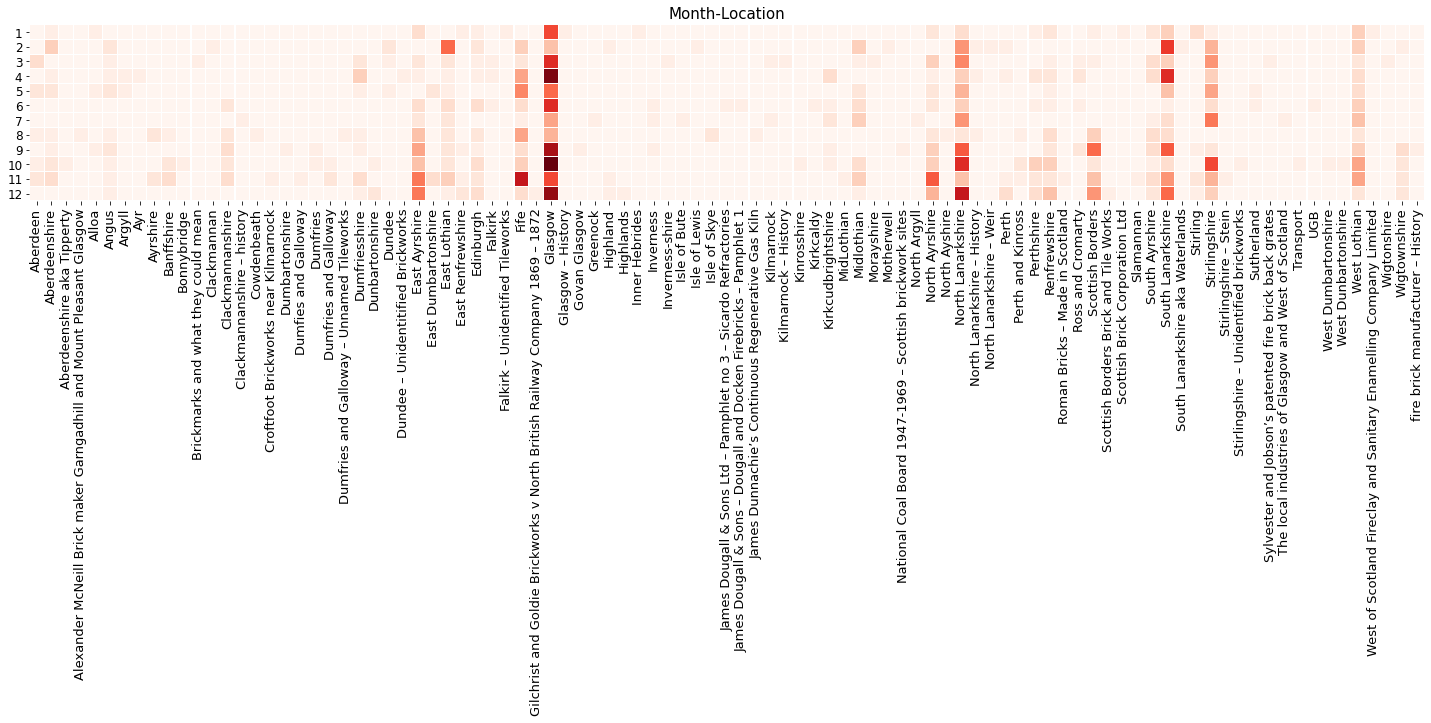

In [14]:
d_loc_time = dict()
for loc in l_t_loc:
    d_loc_time[loc[0]] = [0 for i in range(12)]
for res in requests_results:
    d_loc_time[res[0][-1]][int(res[1][1])-1] += 1
mtx_loc_time = np.array([d_loc_time[i] for i in d_loc_time]).T

corrmat = mtx_loc_time
f,ax = plt.subplots(figsize=(25, 25))
ax.set_xticklabels(corrmat,rotation='horizontal')
sns.heatmap(corrmat, fmt="d",cmap='Reds', linewidths=0.1, square=True, cbar=False)
ax.set_xticklabels([i for i in d_loc_time])
ax.set_yticklabels([i+1 for i in range(12)])
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.title('Month-Location',fontsize=15)
plt.show()

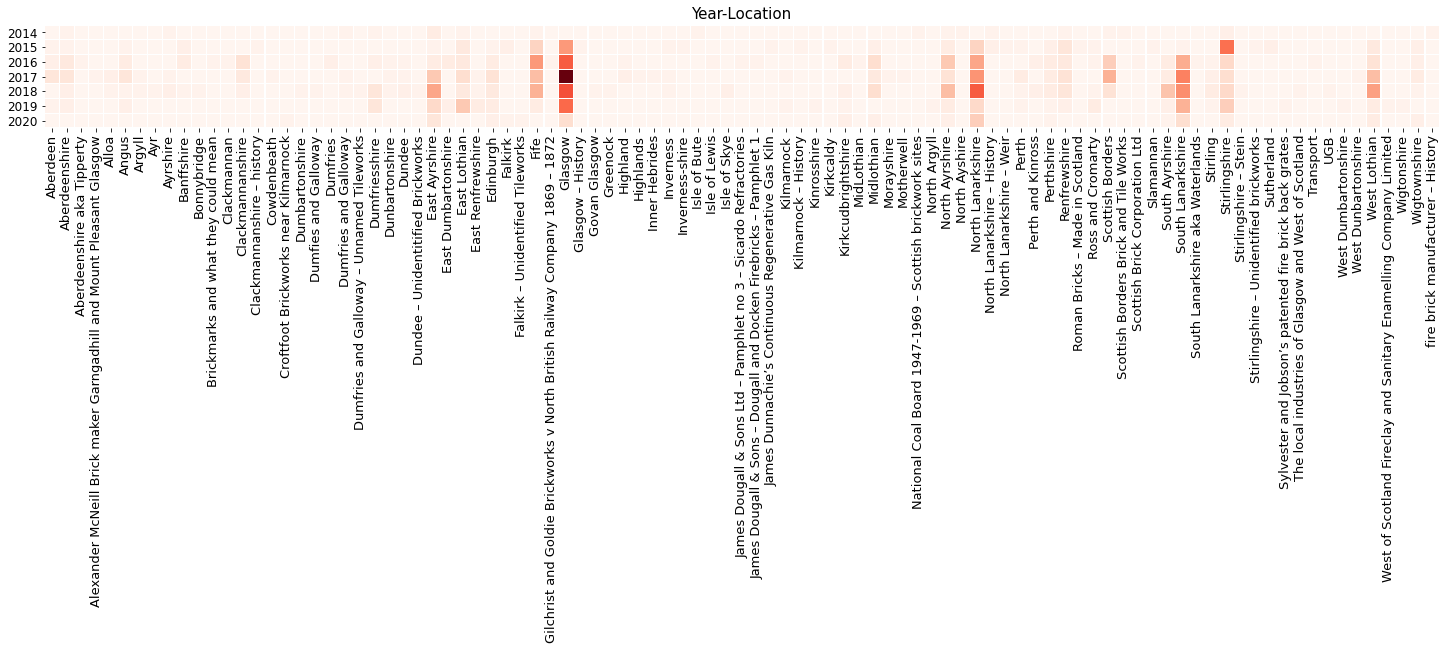

In [15]:
d_loc_year = dict()
for loc in l_t_loc:
    d_loc_year[loc[0]] = [0 for i in range(7)]
for res in requests_results:
    d_loc_year[res[0][-1]][int(res[1][-1])-2014] += 1
mtx_loc_year = np.array([d_loc_year[i] for i in d_loc_year]).T

corrmat = mtx_loc_year
f,ax = plt.subplots(figsize=(25, 25))
ax.set_xticklabels(corrmat,rotation='horizontal')
sns.heatmap(corrmat, fmt="d",cmap='Reds', linewidths=0.1, square=True, cbar=False)
ax.set_xticklabels([i for i in d_loc_year])
ax.set_yticklabels([i+2014 for i in range(7)])
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.title('Year-Location',fontsize=15)
plt.show()